In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
# Read the dataset
df = pd.read_csv('student.csv')

In [200]:
# Checking the number of fields and entries
df.shape

(395, 31)

In [201]:
# Checking for numerical and categorical features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [202]:
# Checking for null values. The dataset seems to be clean with no null values.
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

# Since the dataset is clean, we can proceed with the EDA

In [203]:
# Checking for categorical columns
categorical_features = df.select_dtypes(include = ["object"]).columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns

In [204]:
categorical_features

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'passed'],
      dtype='object')

In [205]:
# Taking the categorical columns and finding out if the coulmns are important predictors of the target variable with the help
# of chi- square test
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [206]:
# Chi Square Class
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX,colY, alpha):
        result = ""
        if self.p<alpha:
            result="Two variables are DEPENDENT".format(colX)
        else:
            result="Two variables are INDEPENDENT".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,colY,alpha)


In [207]:
cT = ChiSquare(df)

#Feature Selection
testColumns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']
for var in testColumns:
    cT.TestIndependence(colX=var,colY='passed')

Two variables are INDEPENDENT
Two variables are INDEPENDENT
Two variables are INDEPENDENT
Two variables are INDEPENDENT
Two variables are INDEPENDENT
Two variables are INDEPENDENT
Two variables are INDEPENDENT
Two variables are INDEPENDENT
Two variables are INDEPENDENT
Two variables are INDEPENDENT
Two variables are INDEPENDENT
Two variables are INDEPENDENT
Two variables are INDEPENDENT
Two variables are INDEPENDENT
Two variables are DEPENDENT
Two variables are INDEPENDENT
Two variables are INDEPENDENT


yes    265
no     130
Name: passed, dtype: int64


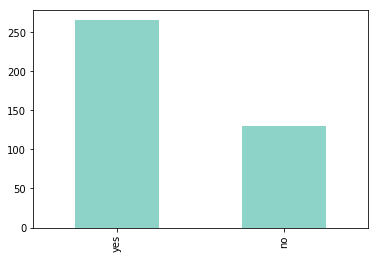

In [208]:
# Total number of passed and failure students
print(df["passed"].value_counts())
df["passed"].value_counts().plot(kind='bar',colormap="Set3")
# As observed, the passing percentage is approx 67%

F    208
M    187
Name: sex, dtype: int64


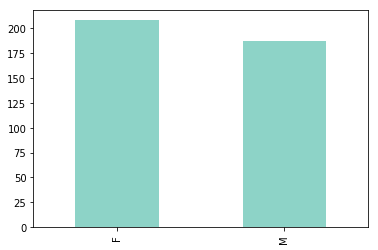

In [209]:
print(df["sex"].value_counts())
df['sex'].value_counts().plot(kind='bar',colormap="Set3")

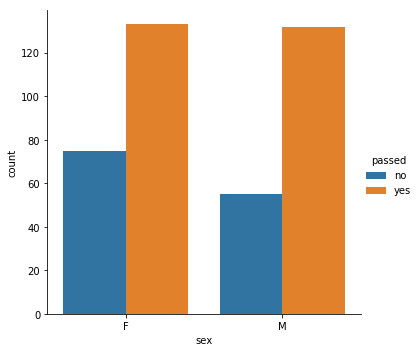

In [210]:
sns.catplot(x="sex", hue="passed",kind="count", data=df)

In [211]:
df.groupby(['sex','passed'])['passed'].count()

# The total count of passed students is same but the passing percentage of male is better than females

sex  passed
F    no         75
     yes       133
M    no         55
     yes       132
Name: passed, dtype: int64

In [212]:
df.groupby(['school','passed'])['passed'].count()
# The passing percentage is almost the same in both. Dropping this column will not result in any major affect.

school  passed
GP      no        113
        yes       236
MS      no         17
        yes        29
Name: passed, dtype: int64

In [213]:
df.drop(['school'], axis = 1 , inplace = True)

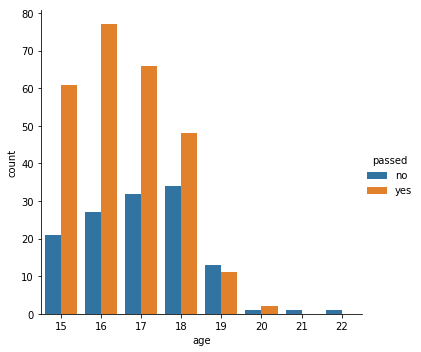

In [214]:
# Checking for age
df.groupby(['age','passed'])['passed'].count()
sns.catplot(x="age", hue="passed",kind="count", data=df)
# We see that there are only 4 students above age 19. They can be considered as outliers
# Also, the failure percentage increases wwith increase in age

In [215]:
# Removing students with age above 19 years
df = df.loc[(df['age']< 20),]

address  passed
R        no         32
         yes        55
U        no         95
         yes       208
Name: passed, dtype: int64


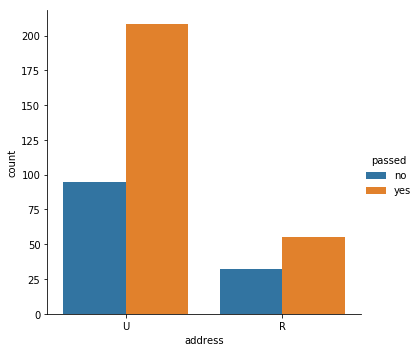

In [216]:
print(df.groupby(['address','passed'])['passed'].count())
sns.catplot(x="address", hue="passed",kind="count", data=df)
# No major variation in rural and urban kids. The column can be dropped

In [217]:
df.drop(['address'], axis = 1 , inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


famsize  passed
GT3      no         94
         yes       183
LE3      no         33
         yes        80
Name: passed, dtype: int64


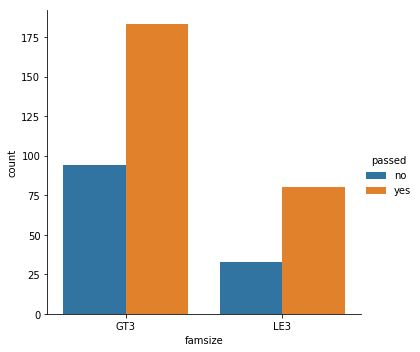

In [218]:
print(df.groupby(['famsize','passed'])['passed'].count())
sns.catplot(x="famsize", hue="passed",kind="count", data=df)
# Again, no major difference in the ratio of pass and fail with respect to family size. 

In [219]:
# Dropping familysize  column
df.drop(['famsize'],axis = 1, inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Pstatus  passed
A        no         10
         yes        29
T        no        117
         yes       234
Name: passed, dtype: int64


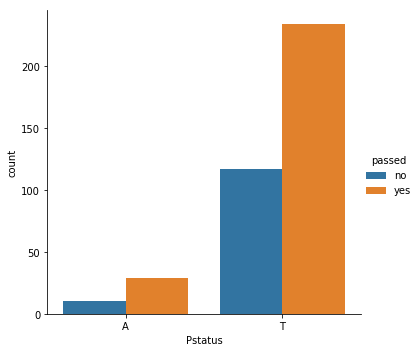

In [220]:
print(df.groupby(['Pstatus','passed'])['passed'].count())
sns.catplot(x="Pstatus", hue="passed",kind="count", data=df)
# Shows variance. Keep it as it is.

Medu  passed
0     no         1
      yes        2
1     no        24
      yes       34
2     no        35
      yes       67
3     no        34
      yes       63
4     no        33
      yes       97
Name: passed, dtype: int64


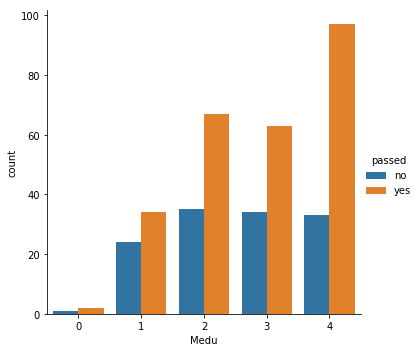

In [221]:
print(df.groupby(['Medu','passed'])['passed'].count())
sns.catplot(x="Medu", hue="passed",kind="count", data=df)

Fedu  passed
0     yes        2
1     no        33
      yes       47
2     no        37
      yes       75
3     no        33
      yes       67
4     no        24
      yes       72
Name: passed, dtype: int64


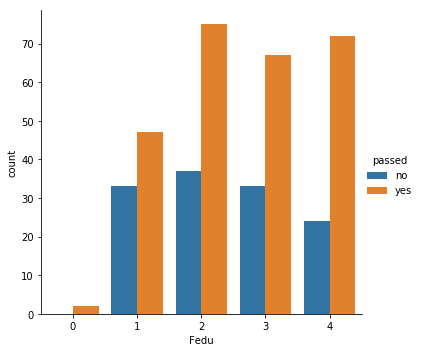

In [222]:
print(df.groupby(['Fedu','passed'])['passed'].count())
sns.catplot(x="Fedu", hue="passed",kind="count", data=df)

In [223]:
df['parent_edu'] = df['Medu']+df['Fedu']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


parent_edu  passed
1           no         1
            yes        1
2           no        15
            yes       23
3           no        17
            yes       26
4           no        27
            yes       43
5           no        15
            yes       31
6           no        16
            yes       47
7           no        19
            yes       39
8           no        17
            yes       53
Name: passed, dtype: int64


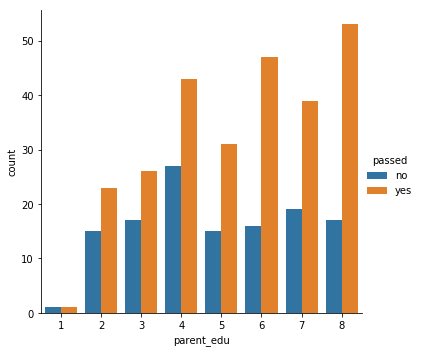

In [224]:
print(df.groupby(['parent_edu','passed'])['passed'].count())
sns.catplot(x="parent_edu", hue="passed",kind="count", data=df)

In [225]:
# Dropping the individual fields of mother and father education and keeping parent education as the criteria
df.drop(['Medu','Fedu'], axis = 1, inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Mjob      passed
at_home   no        22
          yes       37
health    no         7
          yes       26
other     no        52
          yes       88
services  no        27
          yes       73
teacher   no        19
          yes       39
Name: passed, dtype: int64


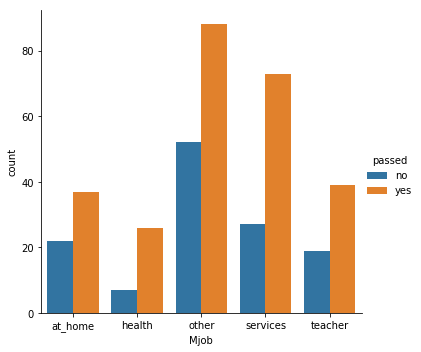

In [226]:
print(df.groupby(['Mjob','passed'])['passed'].count())
sns.catplot(x="Mjob", hue="passed",kind="count", data=df)

Fjob      passed
at_home   no          8
          yes        12
health    no          6
          yes        12
other     no         68
          yes       146
services  no         38
          yes        71
teacher   no          7
          yes        22
Name: passed, dtype: int64


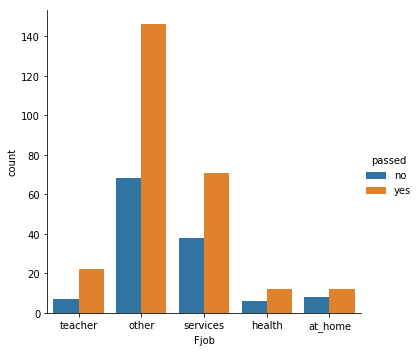

In [227]:
print(df.groupby(['Fjob','passed'])['passed'].count())
sns.catplot(x="Fjob", hue="passed",kind="count", data=df)

In [228]:
df.drop(['Fjob','Mjob'], axis = 1, inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


reason      passed
course      no        54
            yes       87
home        no        36
            yes       73
other       no         8
            yes       27
reputation  no        29
            yes       76
Name: passed, dtype: int64


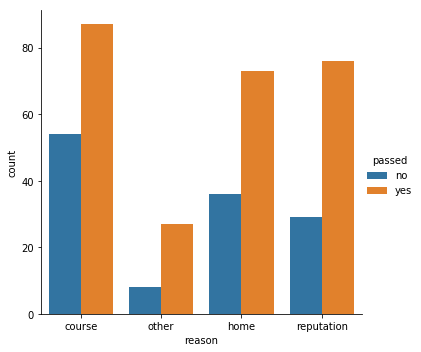

In [229]:
print(df.groupby(['reason','passed'])['passed'].count())
sns.catplot(x="reason", hue="passed",kind="count", data=df)

In [230]:
# Again, no concrete information can be drawn. So again dropping the columns
df.drop(['reason'], axis = 1, inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


guardian  passed
father    no         25
          yes        65
mother    no         88
          yes       184
other     no         14
          yes        14
Name: passed, dtype: int64


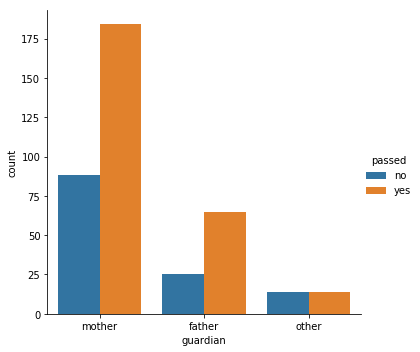

In [231]:
print(df.groupby(['guardian','passed'])['passed'].count())
sns.catplot(x="guardian", hue="passed",kind="count", data=df)

In [232]:
# The failure percentage is higher if the student guardian is some other than father or mother.
# Makes sense that if any parent is guiding the student, chances of passing is more as they might be motivating the student 
# Making it ordinal
df['guardian'] = df['guardian'].replace({'father':1,'mother':1,'other':0})

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


traveltime  passed
1           no         77
            yes       176
2           no         39
            yes        67
3           no          8
            yes        15
4           no          3
            yes         5
Name: passed, dtype: int64


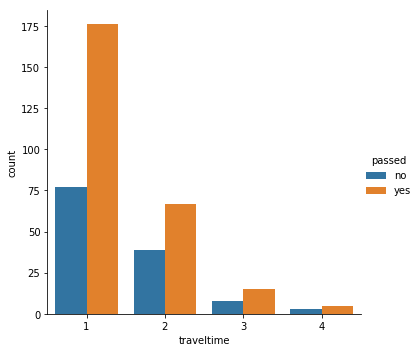

In [233]:
# Checking if travel time impacts the result
print(df.groupby(['traveltime','passed'])['passed'].count())
sns.catplot(x="traveltime", hue="passed",kind="count", data=df)
# We dont see any concluding evidence. The percentage of failure tends to increase if the time taken is more

studytime  passed
1          no         35
           yes        67
2          no         69
           yes       128
3          no         16
           yes        48
4          no          7
           yes        20
Name: passed, dtype: int64


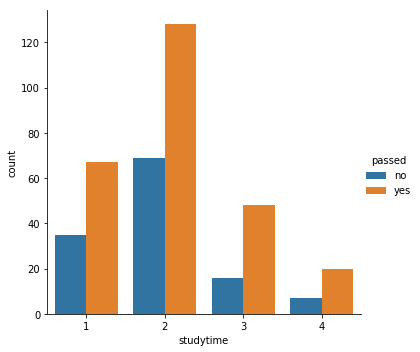

In [234]:
# Checking if study time impacts the result
print(df.groupby(['studytime','passed'])['passed'].count())
sns.catplot(x="studytime", hue="passed",kind="count", data=df)
# We dont see any concluding evidence. The percentage of failure tends to decrease if the study time is more

failures  passed
0         no         78
          yes       233
1         no         26
          yes        24
2         no         13
          yes         2
3         no         10
          yes         4
Name: passed, dtype: int64


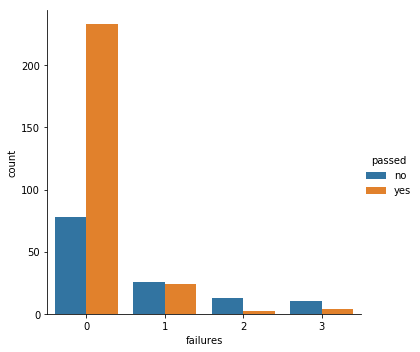

In [235]:
print(df.groupby(['failures','passed'])['passed'].count())
sns.catplot(x="failures", hue="passed",kind="count", data=df)
# Shows that weak students take more attempts to pass and their failure percentage is more as no of attempts increases

schoolsup  passed
no         no        104
           yes       235
yes        no         23
           yes        28
Name: passed, dtype: int64


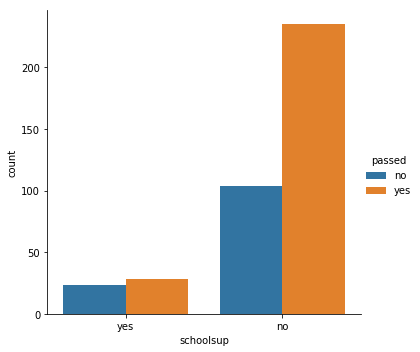

In [236]:
print(df.groupby(['schoolsup','passed'])['passed'].count())
sns.catplot(x="schoolsup", hue="passed",kind="count", data=df)
# Shows no significant change in passing percentage when the school provides additional education support 

In [237]:
# Dropping column schoolsup as does not give an meaningful information to predict student result
df.drop(['schoolsup'], axis = 1, inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


famsup  passed
no      no         43
        yes       107
yes     no         84
        yes       156
Name: passed, dtype: int64


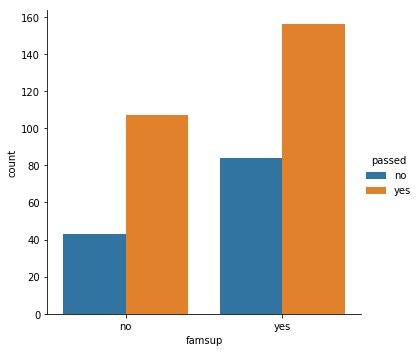

In [238]:
print(df.groupby(['famsup','passed'])['passed'].count())
sns.catplot(x="famsup", hue="passed",kind="count", data=df)
# Again no concluding evidence. Also shown by chi- square test. Can be dropped for model building

In [239]:
# Dropping column famsup as does not give an meaningful information to predict student result
df.drop(['famsup'], axis = 1, inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


paid  passed
no    no         77
      yes       134
yes   no         50
      yes       129
Name: passed, dtype: int64


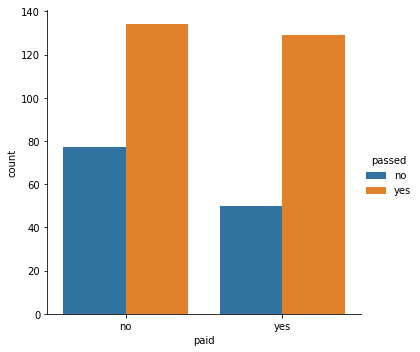

In [240]:
print(df.groupby(['paid','passed'])['passed'].count())
sns.catplot(x="paid", hue="passed",kind="count", data=df)
# The passing percentage is more if the students have paid for additional classes.
# May be assumed that sharp students enroll to learn little extra.

activities  passed
no          no         62
            yes       128
yes         no         65
            yes       135
Name: passed, dtype: int64


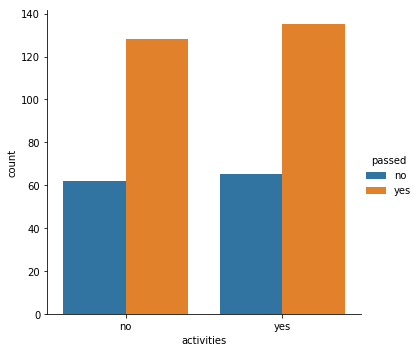

In [241]:
print(df.groupby(['activities','passed'])['passed'].count())
sns.catplot(x="activities", hue="passed",kind="count", data=df)
# Shows the same result. So can be dropped

In [242]:
df.drop(['activities'], axis = 1, inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


nursery  passed
no       no         24
         yes        54
yes      no        103
         yes       209
Name: passed, dtype: int64


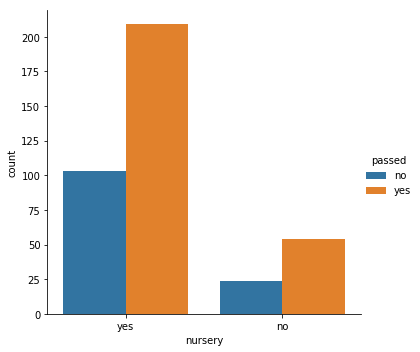

In [243]:
print(df.groupby(['nursery','passed'])['passed'].count())
sns.catplot(x="nursery", hue="passed",kind="count", data=df)

In [244]:
# As expected, this should not play a major role in deciding the student result. So dropping this as well.
df.drop(['nursery'], axis = 1, inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


higher  passed
no      no         12
        yes         7
yes     no        115
        yes       256
Name: passed, dtype: int64


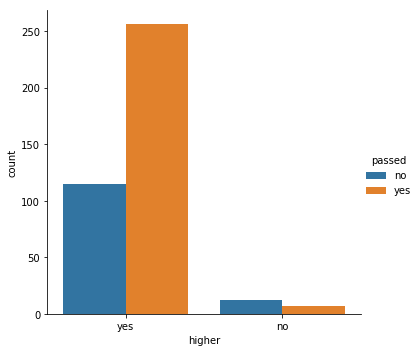

In [245]:
print(df.groupby(['higher','passed'])['passed'].count())
sns.catplot(x="higher", hue="passed",kind="count", data=df)
# The tendency to pass is higher in case you want to opt for higher education.
# Chi- Square test confirms that the result is dependent on this

internet  passed
no        no         24
          yes        39
yes       no        103
          yes       224
Name: passed, dtype: int64


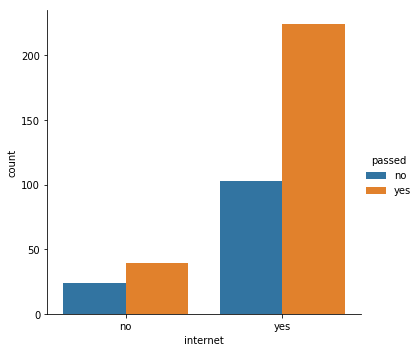

In [246]:
print(df.groupby(['internet','passed'])['passed'].count())
sns.catplot(x="internet", hue="passed",kind="count", data=df)
# The tendency to pass is higher in case student have access to internet.

romantic  passed
no        no         76
          yes       184
yes       no         51
          yes        79
Name: passed, dtype: int64


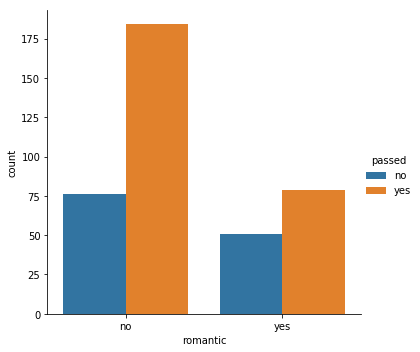

In [247]:
print(df.groupby(['romantic','passed'])['passed'].count())
sns.catplot(x="romantic", hue="passed",kind="count", data=df)
# Student involved in a romantic relationship has more likelihood to fail as they are distracted from studies.

famrel  passed
1       no          2
        yes         6
2       no          7
        yes        11
3       no         26
        yes        42
4       no         64
        yes       131
5       no         28
        yes        73
Name: passed, dtype: int64


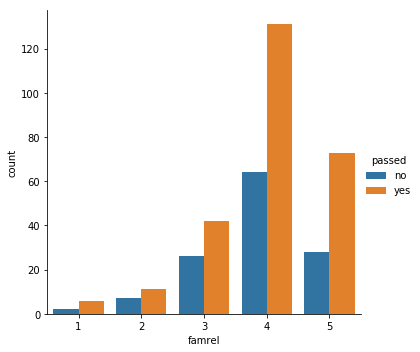

In [248]:
print(df.groupby(['famrel','passed'])['passed'].count())
sns.catplot(x="famrel", hue="passed",kind="count", data=df)
# It may affect the result. Keeping it as it is.

freetime  passed
1         no          7
          yes        12
2         no         15
          yes        49
3         no         56
          yes       101
4         no         40
          yes        73
5         no          9
          yes        28
Name: passed, dtype: int64


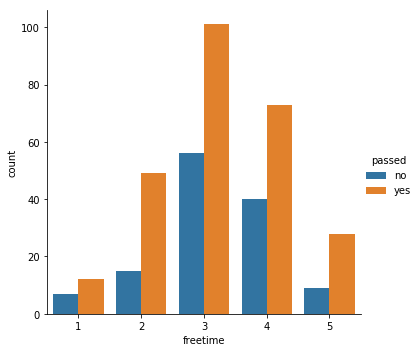

In [249]:
print(df.groupby(['freetime','passed'])['passed'].count())
sns.catplot(x="freetime", hue="passed",kind="count", data=df)
# May affect the result

goout  passed
1      no         6
       yes       17
2      no        24
       yes       79
3      no        36
       yes       91
4      no        37
       yes       48
5      no        24
       yes       28
Name: passed, dtype: int64


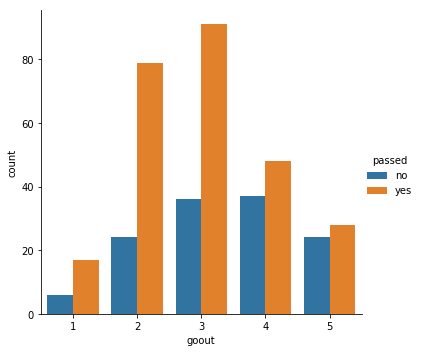

In [250]:
print(df.groupby(['goout','passed'])['passed'].count())
sns.catplot(x="goout", hue="passed",kind="count", data=df)
# When going out with friends increase, it affects the passing percentage

In [251]:
# Total alcohol consumption rating
df['total_alc'] =  df['Dalc']+df['Walc']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


total_alc  passed
2          no        49
           yes       99
3          no        18
           yes       48
4          no        19
           yes       41
5          no        13
           yes       32
6          no        17
           yes       17
7          no         5
           yes       12
8          no         3
           yes        6
9          no         2
           yes        1
10         no         1
           yes        7
Name: passed, dtype: int64


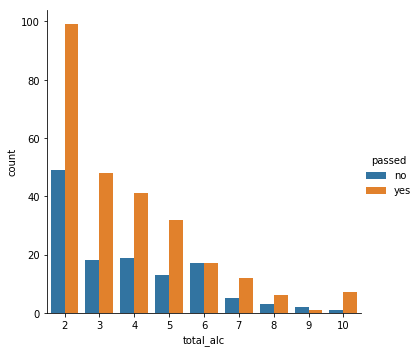

In [252]:
print(df.groupby(['total_alc','passed'])['passed'].count())
sns.catplot(x="total_alc", hue="passed",kind="count", data=df)
# Excess drinkers have more likelihood of getting bad results

In [253]:
df.drop(['Dalc','Walc'], axis = 1, inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


health  passed
1       no         9
        yes       37
2       no        15
        yes       30
3       no        30
        yes       59
4       no        23
        yes       42
5       no        50
        yes       95
Name: passed, dtype: int64


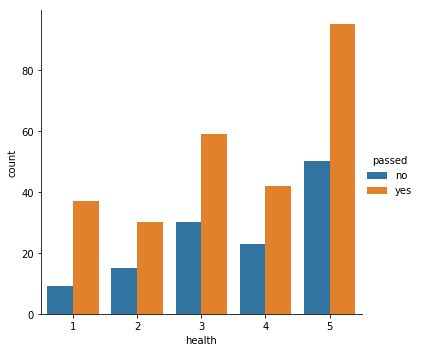

In [254]:
print(df.groupby(['health','passed'])['passed'].count())
sns.catplot(x="health", hue="passed",kind="count", data=df)
# No concluding relationship. Lets drop this column

In [255]:
# Dropping health column
df.drop(['health'], axis = 1, inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


absences  passed
0         no        50
          yes       64
1         yes        3
2         no        12
          yes       53
3         no         1
          yes        6
4         no        12
          yes       40
5         no         3
          yes        2
6         no         6
          yes       25
7         no         3
          yes        4
8         no         6
          yes       16
9         no         1
          yes        2
10        no         5
          yes       12
11        yes        2
12        no         3
          yes        9
13        no         1
          yes        2
14        no         7
          yes        5
15        no         3
16        no         2
          yes        4
17        yes        1
18        no         3
          yes        2
19        yes        1
20        no         1
          yes        3
21        yes        1
22        no         2
          yes        1
23        yes        1
24        yes        1
25        yes    

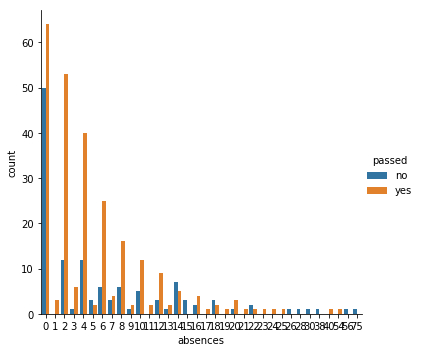

In [256]:
print(df.groupby(['absences','passed'])['passed'].count())
sns.catplot(x="absences", hue="passed",kind="count", data=df)
# Cant draw a conclusion as students with no absent rate also have a high failure rate and student with high absentism also pass

In [257]:
# Dropping the coulmn
df.drop(['absences'], axis = 1, inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Model Building

In [258]:
df.head()

,sex,age,Pstatus,guardian,traveltime,studytime,failures,paid,higher,internet,romantic,famrel,freetime,goout,passed,parent_edu,total_alc
0,F,18,A,1,2,2,0,no,yes,no,no,4,3,4,no,8,2
1,F,17,T,1,1,2,0,no,yes,yes,no,5,3,3,no,2,2
2,F,15,T,1,1,2,3,yes,yes,yes,no,4,3,2,yes,2,5
3,F,15,T,1,1,3,0,yes,yes,yes,yes,3,2,2,yes,6,2
4,F,16,T,1,1,2,0,yes,yes,no,no,4,3,2,yes,6,3


In [259]:
df['passed'] = df['passed'].replace({'no':0,'yes':1})

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [260]:
df['passed'].value_counts()

1    263
0    127
Name: passed, dtype: int64

In [261]:
# Separating out the categorical columns and one hot encoding them
categorical_features = df.select_dtypes(include = ["object"]).columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns

In [262]:
categorical_features

Index(['sex', 'Pstatus', 'paid', 'higher', 'internet', 'romantic'], dtype='object')

In [263]:
df_cat = df[categorical_features]
df_num = df[numerical_features]

In [264]:
# Create dummy features for categorical values via one-hot encoding
df_cat = pd.get_dummies(df_cat)

In [266]:
df_num.head()

,age,guardian,traveltime,studytime,failures,famrel,freetime,goout,passed,parent_edu,total_alc
0,18,1,2,2,0,4,3,4,0,8,2
1,17,1,1,2,0,5,3,3,0,2,2
2,15,1,1,2,3,4,3,2,1,2,5
3,15,1,1,3,0,3,2,2,1,6,2
4,16,1,1,2,0,4,3,2,1,6,3


In [268]:
y = df_num['passed']
df_num.drop(['passed'],axis = 1, inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [269]:
# Concatinating both to get the final training data
df_train = pd.concat([df_num, df_cat], axis = 1)

In [271]:
df_train.columns

Index(['age', 'guardian', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'parent_edu', 'total_alc', 'sex_F', 'sex_M',
       'Pstatus_A', 'Pstatus_T', 'paid_no', 'paid_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [270]:
from sklearn.model_selection import cross_val_score, train_test_split

In [272]:
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size = 0.2, random_state = 0)

In [280]:
y_test.value_counts()

1    46
0    32
Name: passed, dtype: int64

# KNN Classifier

In [285]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [286]:
#Predict Output
predicted= model.predict(X_test) 
print(predicted)

[1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1]


In [287]:
# compute classification accuracy for the  model
from sklearn import metrics

print(metrics.accuracy_score(y_test, predicted))

0.6153846153846154


# Logistic Regression

In [291]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predict the response values for the observations in X
lr_predicted = logreg.predict(X_test)

In [292]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y_test, lr_predicted))

0.6923076923076923


# Decision Tree

In [293]:
from sklearn import tree

dec_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
dec_tree.fit(X_train,y_train)
dt_predicted = dec_tree.predict(X_test)

In [294]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y_test, dt_predicted))

0.6666666666666666


In [296]:
from sklearn.metrics import accuracy_score
accuracy =  accuracy_score(y_test, dt_predicted) * 100
accuracy

66.66666666666666

# Random Forest Classifier

In [300]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)

In [301]:
accuracy =  accuracy_score(y_test, rf_predicted) * 100
accuracy

61.53846153846154

# SVM

In [308]:
from sklearn.svm import SVC
svm = SVC(kernel="linear", random_state = 101)
svm.fit(X_train,y_train)
svm_predicted = svm.predict(X_test)

In [309]:
accuracy =  accuracy_score(y_test, svm_predicted) * 100
accuracy

69.23076923076923

# Naive Bayes

In [310]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [311]:

nb =  GaussianNB()
nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)

In [314]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)
test_calc
test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['passed'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[14 18]
 [ 4 42]]
accuracy: 0.717948717948718
precision: 0.7
recall: 0.9130434782608695
f1 score:  0.7924528301886793


# SGD

In [315]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [316]:
sgd =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd.fit(X_train, y_train)
y_pred=sgd.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [317]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['passed'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[ 2 30]
 [ 0 46]]
accuracy: 0.6153846153846154
precision: 0.6052631578947368
recall: 1.0
f1 score:  0.7540983606557378
